In [1]:
import pandas as pd

# 데이터 불러오기
customers = pd.read_csv("customer_c.csv")
transactions = pd.read_csv("transactions_c.csv")
articles = pd.read_csv("articles_c.csv")

# 상위 5행 확인
print(customers.head())
print(transactions.head())
print(articles.head())

# 결측치 확인
print(customers.isnull().sum())
print(transactions.isnull().sum())
print(articles.isnull().sum())

FileNotFoundError: [Errno 2] No such file or directory: 'customer_c.csv'

In [ ]:
import pandas as pd

# 1. 데이터 준비 (메모리 효율을 위해 필요한 컬럼만 추출)
if 'transactions' in locals() and 'customers' in locals() and 'articles' in locals():
    
    # 필요한 데이터만 복사
    tx_small = transactions[['customer_id', 'article_id', 'price']].copy()
    cust_small = customers[['customer_id', 'age']].copy()
    art_small = articles[['article_id', 'prod_name', 'product_group_name']].copy()
    
    # 2. 데이터 병합 (Merge)
    # 고객 정보 결합
    merged_df = pd.merge(tx_small, cust_small, on='customer_id', how='left')
    merged_df = merged_df.dropna(subset=['age']) # 나이 없는 데이터 제거
    
    # 상품 정보 결합
    merged_df = pd.merge(merged_df, art_small, on='article_id', how='left')

    # 3. 연령대 그룹화 (Binning)
    bins = [0, 19, 29, 39, 49, 59, 100]
    labels = ['Teens (~19)', '20s', '30s', '40s', '50s', 'Senior (60+)']
    merged_df['Age_Group'] = pd.cut(merged_df['age'], bins=bins, labels=labels)

    # 4. 연령대별 매출 집계 (Sum Price)
    # count()가 아니라 sum()을 사용합니다.
    age_revenue = merged_df.groupby(['Age_Group', 'prod_name', 'product_group_name'])['price'].sum().reset_index(name='total_revenue')
    
    # 5. 매출 기준 Top 5 추출
    # 그룹별로 매출 내림차순 정렬 후 상위 5개 자르기
    top5_revenue_by_age = age_revenue.sort_values(['Age_Group', 'total_revenue'], ascending=[True, False]).groupby('Age_Group').head(5)

    # 6. 결과 출력
    print("💰 [연령대별 매출(Revenue) 효자 상품 Top 5]")
    print("=" * 65)
    
    # 숫자 보기 좋게 포맷팅
    pd.options.display.float_format = '{:.2f}'.format
    
    for group in labels:
        print(f"\n💳 {group} Generation's Wallet Pick:")
        
        # 해당 연령대 데이터 필터링
        group_data = top5_revenue_by_age[top5_revenue_by_age['Age_Group'] == group]
        
        # 컬럼 선택 및 출력
        display_df = group_data[['prod_name', 'product_group_name', 'total_revenue']]
        print(display_df.to_string(index=False))
        print("-" * 50)

else:
    print("🚨 transactions, customers, articles 데이터가 모두 로드되어 있어야 합니다!")

💰 [연령대별 매출(Revenue) 효자 상품 Top 5]

💳 Teens (~19) Generation's Wallet Pick:
                  prod_name product_group_name  total_revenue
   Jade HW Skinny Denim TRS Garment Lower body           6.38
                RICHIE HOOD Garment Upper body           2.41
Simple as That Triangle Top           Swimwear           1.95
               Becka hoodie Garment Upper body           1.74
             Luna skinny RW Garment Lower body           1.61
--------------------------------------------------

💳 20s Generation's Wallet Pick:
                 prod_name product_group_name  total_revenue
  Jade HW Skinny Denim TRS Garment Lower body          77.14
            Luna skinny RW Garment Lower body          39.97
        Shaping Skinny H.W Garment Lower body          28.88
 Perrie Slim Mom Denim TRS Garment Lower body          26.01
Embrace S.Skinny Ankle H.W Garment Lower body          25.55
--------------------------------------------------

💳 30s Generation's Wallet Pick:
               prod_

🌤️ [시즌별 매출(Revenue) 효자 상품 Top 5]

📌 1_Spring (3~5월) Best Sellers:
                  prod_name product_group_name  total_revenue
            Kanta slacks RW Garment Lower body          39.66
   Jade HW Skinny Denim TRS Garment Lower body          37.85
Simple as That Triangle Top           Swimwear          33.36
             Luna skinny RW Garment Lower body          31.23
             SUPREME tights Garment Lower body          25.61
--------------------------------------------------

📌 2_Summer (6~8월) Best Sellers:
                  prod_name product_group_name  total_revenue
   Jade HW Skinny Denim TRS Garment Lower body          32.65
Simple as That Triangle Top           Swimwear          22.88
             Luna skinny RW Garment Lower body          22.45
     Shake it in Balconette           Swimwear          21.53
          Ozzy Denim Shorts Garment Lower body          20.01
--------------------------------------------------

📌 3_Fall (9~11월) Best Sellers:
                 prod_n

/Users/majinbae/h&m dataset/venv/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
/Users/majinbae/h&m dataset/venv/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/majinbae/h&m dataset/venv/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/majinbae/h&m dataset/venv/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be re

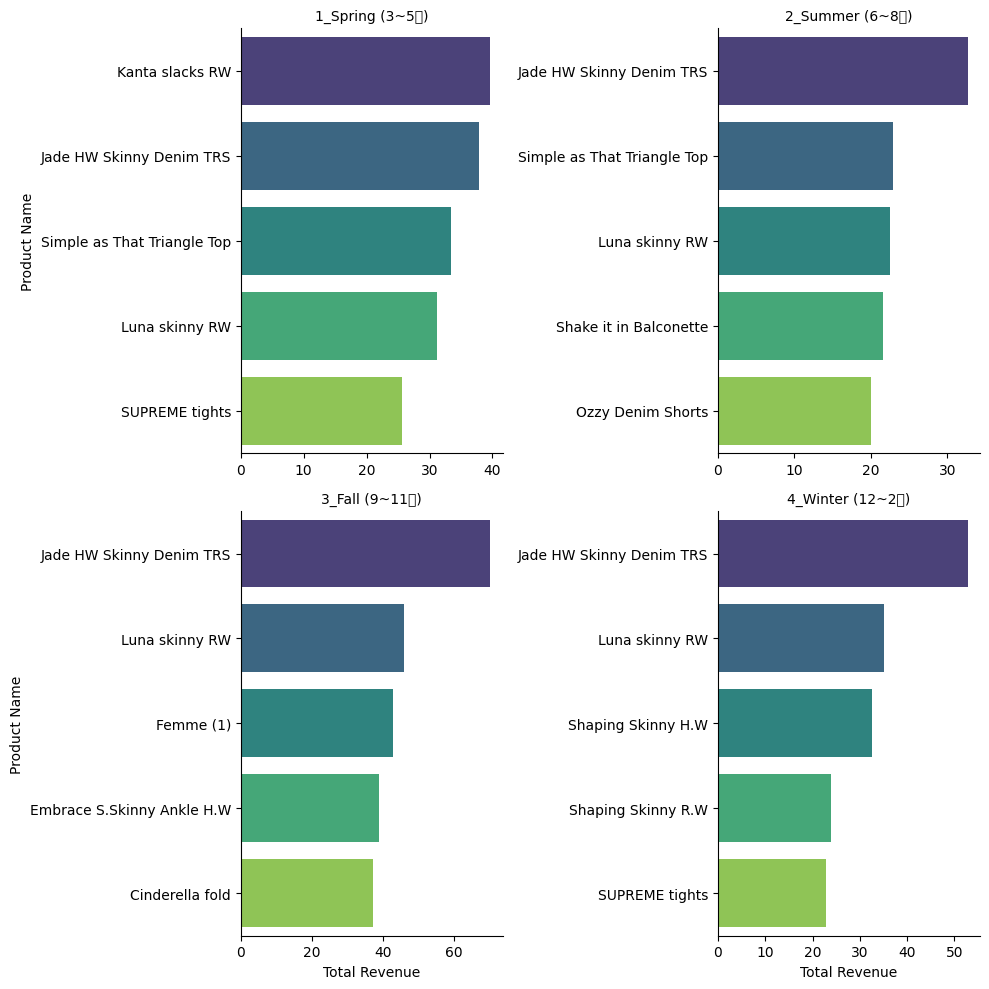

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 준비
if 'transactions' in locals() and 'articles' in locals():
    # 데이터 복사 및 병합
    if 'df_merged' in locals():
        df = df_merged.copy()
    else:
        tx_small = transactions[['t_dat', 'article_id', 'price']].copy()
        art_small = articles[['article_id', 'prod_name', 'product_group_name']].copy()
        df = pd.merge(tx_small, art_small, on='article_id', how='left')

    # 2. 날짜 변환 및 시즌 정의 함수 적용
    df['t_dat'] = pd.to_datetime(df['t_dat'])
    df['month'] = df['t_dat'].dt.month

    def get_season(month):
        if month in [3, 4, 5]: return '1_Spring (3~5월)'
        elif month in [6, 7, 8]: return '2_Summer (6~8월)'
        elif month in [9, 10, 11]: return '3_Fall (9~11월)'
        else: return '4_Winter (12~2월)' 

    df['Season'] = df['month'].apply(get_season)

    # 3. [오류 수정된 부분] 시즌별 매출 집계
    # 끝에 .reset_index(name='total_revenue') 까지 한 줄에 다 들어가야 합니다.
    season_rev = df.groupby(['Season', 'prod_name', 'product_group_name'])['price'].sum().reset_index(name='total_revenue')

    # 4. 시즌별 Top 5 추출
    top5_season = season_rev.sort_values(['Season', 'total_revenue'], ascending=[True, False]).groupby('Season').head(5)

    # 5. 결과 출력
    print("🌤️ [시즌별 매출(Revenue) 효자 상품 Top 5]")
    print("=" * 60)
    
    pd.options.display.float_format = '{:.2f}'.format
    
    seasons = ['1_Spring (3~5월)', '2_Summer (6~8월)', '3_Fall (9~11월)', '4_Winter (12~2월)']
    
    for s in seasons:
        print(f"\n📌 {s} Best Sellers:")
        # 해당 시즌 데이터가 있는지 확인 후 출력
        season_data = top5_season[top5_season['Season'] == s]
        if not season_data.empty:
            print(season_data[['prod_name', 'product_group_name', 'total_revenue']].to_string(index=False))
        else:
            print("데이터 없음")
        print("-" * 50)

    # 6. 시각화
    try:
        g = sns.FacetGrid(top5_season, col="Season", col_wrap=2, height=5, sharex=False, sharey=False)
        g.map_dataframe(sns.barplot, x="total_revenue", y="prod_name", palette="viridis")
        g.set_titles("{col_name}")
        g.set_axis_labels("Total Revenue", "Product Name")
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"시각화 중 오류 발생 (데이터 부족 등): {e}")

else:
    print("🚨 데이터를 먼저 로드해주세요!")

In [ ]:
import pandas as pd

# 1. 데이터 준비
if 'articles' in locals():
    target_df = articles.copy()
else:
    # 데이터가 없다면 빈 데이터프레임 생성 (에러 방지)
    print("🚨 articles 데이터가 없습니다.")
    target_df = pd.DataFrame()

if not target_df.empty:
    # 2. 'recycled' 키워드 필터링 (대소문자 무시)
    recycled_items = target_df[target_df['detail_desc'].str.contains('recycled', case=False, na=False)]

    # 3. 통계 출력
    count = len(recycled_items)
    total = len(target_df)
    ratio = (count / total) * 100

    print(f"🌿 전체 상품 중 'recycled' 키워드가 포함된 상품 수: {count:,}개")
    print(f"📊 전체 대비 비중: {ratio:.2f}%")
    
    print("\n[상품 예시 5개]")
    # .style을 제거하고 기본 텍스트로 출력합니다. (에러 원인 제거)
    pd.options.display.max_colwidth = 1000 # 설명이 길어도 잘리지 않게 설정
    display(recycled_items[['prod_name', 'detail_desc']])

    # 4. 카테고리별 분포 확인
    print("\n[카테고리별 재활용 상품 수 Top 5]")
    print(recycled_items['product_group_name'].value_counts())

🌿 전체 상품 중 'recycled' 키워드가 포함된 상품 수: 3,301개
📊 전체 대비 비중: 3.13%

[상품 예시 5개]


,prod_name,detail_desc
40,Dorian l/s basic,"Long-sleeved sports top in fast-drying, breathable functional fabric with overlocked seams for optimum comfort. Some of the polyester content of the top is recycled."
41,Dorian l/s basic,"Long-sleeved sports top in fast-drying, breathable functional fabric with overlocked seams for optimum comfort. Some of the polyester content of the top is recycled."
42,Dorian l/s basic,"Long-sleeved sports top in fast-drying, breathable functional fabric with overlocked seams for optimum comfort. Some of the polyester content of the top is recycled."
43,Dorian l/s basic,"Long-sleeved sports top in fast-drying, breathable functional fabric with overlocked seams for optimum comfort. Some of the polyester content of the top is recycled."
44,Dorian l/s basic,"Long-sleeved sports top in fast-drying, breathable functional fabric with overlocked seams for optimum comfort. Some of the polyester content of the top is recycled."
...,...,...
105516,TOMTE booties,"Baby Exclusive. Bootees knitted in a wool and recycled polyester blend with a drawstring at the top. Soft, organic cotton jersey lining."
105518,Cool Spiky earcuff pk,Set with earrings and ear cuffs in metal decorated with glass rhinestones. Four earrings in various designs and three ear cuffs. The zinc content of the earrings is recycled.
105519,Flirty Fries earcuff pk,Set with six earrings and an ear cuff in metal decorated with glass rhinestones. The zinc content of the set is recycled.
105528,Saturday jogger,"Joggers in sweatshirt fabric made from a cotton blend with an elasticated, drawstring waist, discreet side pockets and straight legs. Soft brushed inside. The polyester content of the joggers is recycled."



[카테고리별 재활용 상품 수 Top 5]
product_group_name
Garment Upper body    1487
Garment Lower body     712
Garment Full body      394
Accessories            264
Shoes                  192
Swimwear               105
Underwear               85
Socks & Tights          48
Unknown                  7
Nightwear                3
Bags                     2
Items                    2
Name: count, dtype: int64


💰 [일반 상품 vs 친환경 상품 평균 판매가 비교]
👕 일반 상품 평균가: 0.0276
🌿 친환경 상품 평균가: 0.0354
📈 가격 차이(Premium): 친환경 상품이 약 28.5% 더 비쌉니다!


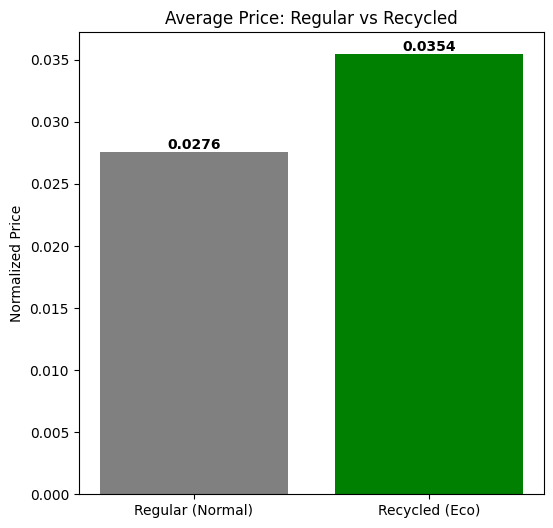

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 준비
# (앞서 만든 recycled_items와 transactions 데이터가 필요합니다)
if 'transactions' in locals() and 'articles' in locals():
    # 전체 거래 데이터 복사
    df_price = transactions[['article_id', 'price']].copy()
    
    # Recycled 상품 ID 목록 추출
    recycled_ids = articles[articles['detail_desc'].str.contains('recycled', case=False, na=False)]['article_id'].unique()
    
    # 2. 'is_recycled' 태그 달기
    # 거래 내역에 있는 상품이 recycled_ids에 포함되면 True, 아니면 False
    df_price['is_recycled'] = df_price['article_id'].isin(recycled_ids)
    
    # 3. 그룹별 평균 가격 계산
    # 가격이 정규화(0~1) 되어 있으므로 보기 좋게 1000을 곱하거나 그대로 비교
    price_comparison = df_price.groupby('is_recycled')['price'].mean().reset_index()
    price_comparison['Type'] = price_comparison['is_recycled'].map({True: 'Recycled (Eco)', False: 'Regular (Normal)'})
    
    # 4. 결과 출력
    print("💰 [일반 상품 vs 친환경 상품 평균 판매가 비교]")
    
    avg_recycled = price_comparison.loc[price_comparison['is_recycled'] == True, 'price'].values[0]
    avg_regular = price_comparison.loc[price_comparison['is_recycled'] == False, 'price'].values[0]
    
    # 몇 배 더 비싼지 계산
    premium_rate = ((avg_recycled - avg_regular) / avg_regular) * 100
    
    print(f"👕 일반 상품 평균가: {avg_regular:.4f}")
    print(f"🌿 친환경 상품 평균가: {avg_recycled:.4f}")
    print(f"📈 가격 차이(Premium): 친환경 상품이 약 {premium_rate:.1f}% 더 {'비쌉니다' if premium_rate > 0 else '쌉니다'}!")

    # 5. 시각화
    plt.figure(figsize=(6, 6))
    colors = ['grey', 'green']
    plt.bar(price_comparison['Type'], price_comparison['price'], color=colors)
    plt.title('Average Price: Regular vs Recycled')
    plt.ylabel('Normalized Price')
    
    # 막대 위에 수치 표시
    for i, v in enumerate(price_comparison['price']):
        plt.text(i, v, f"{v:.4f}", ha='center', va='bottom', fontweight='bold')
        
    plt.show()

else:
    print("🚨 transactions와 articles 데이터를 모두 로드해주세요!")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 준비
if 'transactions' in locals():
    target_df = transactions.copy()
    # 상품명과 그룹명이 없다면 merge
    if 'prod_name' not in target_df.columns:
        art_cols = articles[['article_id', 'prod_name', 'product_group_name']]
        target_df = pd.merge(target_df, art_cols, on='article_id', how='left')
elif 'df_merged' in locals():
    target_df = df_merged.copy()
else:
    print("🚨 데이터를 로드해주세요!")
    target_df = pd.DataFrame()

if not target_df.empty:
    # 2. 상품별 매출 합계 계산 (price 컬럼 합계)
    # product_group_name도 같이 묶어서 어떤 카테고리인지 확인
    top_revenue = target_df.groupby(['prod_name', 'product_group_name'])['price'].sum().reset_index()
    
    # 매출 높은 순으로 정렬 후 상위 20개 추출
    top_20_revenue = top_revenue.sort_values(by='price', ascending=False).head(20)

    # 3. 결과 출력 (표)
    print("💰 [매출(Revenue) 효자 상품 Top 20]")
    # 가독성을 위해 컬럼명 변경
    top_20_revenue.columns = ['Product Name', 'Category', 'Total Revenue']
    display(top_20_revenue)

💰 [매출(Revenue) 효자 상품 Top 20]


,Product Name,Category,Total Revenue
11265,Jade HW Skinny Denim TRS,Garment Lower body,193.57
13952,Luna skinny RW,Garment Lower body,134.85
21331,Shaping Skinny H.W,Garment Lower body,101.84
7939,Embrace S.Skinny Ankle H.W,Garment Lower body,77.10
21333,Shaping Skinny R.W,Garment Lower body,74.24
18730,Push Up Jegging L.W,Garment Lower body,73.80
14870,Mariette Blazer,Garment Upper body,68.34
8498,Femme (1),Garment Upper body,63.31
12125,Kanta slacks RW,Garment Lower body,62.37
6533,Despacito,Garment Upper body,61.73


In [ ]:
import pandas as pd

# 1. 데이터 준비
if 'transactions' in locals():
    df = transactions.copy()
    if 'prod_name' not in df.columns:
        art_cols = articles[['article_id', 'prod_name', 'product_group_name']]
        df = pd.merge(df, art_cols, on='article_id', how='left')
elif 'df_merged' in locals():
    df = df_merged.copy()
else:
    df = pd.DataFrame()

if not df.empty:
    # 2. 날짜 및 월 데이터 확인
    df['t_dat'] = pd.to_datetime(df['t_dat'])
    df['month'] = df['t_dat'].dt.month

    # 3. [핵심 수정] 월별/상품별 매출 합계 계산
    monthly_stats = df.groupby(['month', 'prod_name', 'product_group_name'])['price'].sum().reset_index(name='revenue')
    
    # 판매량도 같이 보고 싶다면 아래처럼 변경 (선택사항)
    # monthly_stats = df.groupby(['month', 'prod_name', 'product_group_name']).agg({'price': 'sum', 'article_id': 'count'}).reset_index()
    # monthly_stats.columns = ['month', 'prod_name', 'product_group_name', 'revenue', 'sales_count']

    # 4. [핵심 수정] 정렬을 이용해서 Top 10 뽑기 (이 방식이 에러가 안 납니다)
    # 월(month)은 오름차순, 매출(revenue)은 내림차순 정렬
    monthly_stats = monthly_stats.sort_values(['month', 'revenue'], ascending=[True, False])
    
    # 각 월별로 위에서 10개씩 자르기
    monthly_top10 = monthly_stats.groupby('month').head(10)

    # 5. 결과 출력
    print("📅 [월별 매출(Revenue) Top 10 리스트]")
    
    for m in range(1, 13):
        print(f"\nExample: {m}월 Best Sellers")
        
        # 이제 'month' 컬럼이 확실히 있으므로 에러가 나지 않습니다.
        current_month_data = monthly_top10[monthly_top10['month'] == m]
        
        # 보기 좋게 출력 (style 기능 없이 기본 출력으로 안전하게)
        display_cols = ['prod_name', 'product_group_name', 'revenue']
        # sales_count가 있다면 추가
        if 'sales_count' in current_month_data.columns:
            display_cols.append('sales_count')
            
        print(current_month_data[display_cols].to_string(index=False))

else:
    print("🚨 데이터를 로드해주세요!")

📅 [월별 매출(Revenue) Top 10 리스트]

Example: 1월 Best Sellers
               prod_name product_group_name  revenue
Jade HW Skinny Denim TRS Garment Lower body    19.95
      Shaping Skinny H.W Garment Lower body    14.77
          Milk RW slacks Garment Lower body    11.10
          Luna skinny RW Garment Lower body    10.52
          Jade Denim TRS Garment Lower body     9.64
      Shaping Skinny R.W Garment Lower body     9.51
     Timeless Sports Top           Swimwear     9.08
          SUPREME tights Garment Lower body     8.98
     Shaping Skinny R.W. Garment Lower body     8.19
                    Bama Garment Upper body     8.00

Example: 2월 Best Sellers
                 prod_name product_group_name  revenue
  Jade HW Skinny Denim TRS Garment Lower body    17.63
            SUPREME tights Garment Lower body    13.42
        Shaping Skinny H.W Garment Lower body    11.71
            Luna skinny RW Garment Lower body     9.43
        Shaping Skinny R.W Garment Lower body     8.61
Embra

In [ ]:
### 결측치 및 이상치 처리
# 1. 범주형 데이터 정리 (fashion_news_frequency)
# 결측치(NaN)를 'NONE'으로 채우기
customers['fashion_news_frequency'] = customers['fashion_news_frequency'].fillna('NONE')
# 2. 희소 카테고리 통합 (Articles)
# 상품 그룹이 50개 미만인 경우 'Others'로 변경
counts = articles['product_group_name'].value_counts()
rare_groups = counts[counts < 50].index
articles['product_group_name'] = articles['product_group_name'].replace(rare_groups, 'Others')
#========================================================================================================
### 데이터 형 변환 및 연령대 파생 컬럼 생성
# 3. articles 데이터 변환 (거의 모든 object 컬럼 변환)
for col in articles.columns:
    if articles[col].dtype == 'object':
        # 고유값이 전체 데이터의 50% 미만인 경우만 변환 (효율적인 기준)
        if articles[col].nunique() < len(articles) * 0.5:
            articles[col] = articles[col].astype('category')
# 4. customers 데이터 변환 (지정해서 변환)
# customer_id는 고유값이 너무 많아 제외합니다.
cols_to_convert = ['fashion_news_frequency', 'club_member_status']
for col in cols_to_convert:
    customers[col] = customers[col].astype('category')
# 5. FN, Active 컬럼 최적화 (bool 또는 int8)
# 방법 A: True/False로 보고 싶을 때 (가장 추천)
customers['FN'] = customers['FN'].astype('bool')
customers['Active'] = customers['Active'].astype('bool')
# 6. 날짜 처리(노션 참조)
transactions["t_dat"] = pd.to_datetime(transactions["t_dat"])
transactions["year"] = transactions["t_dat"].dt.year
transactions["month"] = transactions["t_dat"].dt.month
transactions["weekday"] = transactions["t_dat"].dt.day_name()
# 7. 연령대 컬럼 및 형 변환(노션 참조)(필요 시 형 변환 제거 가능)
customers["age_group"] = (customers["age"] // 10) * 10
customers["age_group"] = customers["age_group"].astype("category")
# 8. -> Offline, 2 -> Online 으로 매핑 후 카테고리 변환
transactions['sales_channel'] = transactions['sales_channel_id'].map({1: 'Offline', 2: 'Online'}).astype('category')
# 기존 sales_channel_id 컬럼은 필요 시 삭제 가능
# transactions = transactions.drop(columns=['sales_channel_id'])
# 결과 확인
print("희소 카테고리 통합 후 분포:")
print(articles['product_group_name'].value_counts().tail())
print("최적화 완료!")
print(customers.info())


희소 카테고리 통합 후 분포:
product_group_name
Socks & Tights         2442
Nightwear              1899
Others                  123
Unknown                 121
Underwear/nightwear      54
Name: count, dtype: int64
최적화 완료!
<class 'pandas.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   customer_id             1048575 non-null  str     
 1   FN                      1048575 non-null  bool    
 2   Active                  1048575 non-null  bool    
 3   club_member_status      1048575 non-null  category
 4   fashion_news_frequency  1048575 non-null  category
 5   age                     1048575 non-null  int64   
 6   age_group               1048575 non-null  category
dtypes: bool(2), category(3), int64(1), str(1)
memory usage: 21.0 MB
None


In [ ]:
# 고객-거래-상품 조인
df = transactions.merge(customers, on="customer_id", how="inner")
df = df.merge(articles, on="article_id", how="inner")

# 날짜 처리
df["t_dat"] = pd.to_datetime(df["t_dat"])
df["year"] = df["t_dat"].dt.year
df["month"] = df["t_dat"].dt.month
df["weekday"] = df["t_dat"].dt.day_name()

df

,t_dat,customer_id,article_id,price,sales_channel_id,year,month,weekday,sales_channel,FN,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec8f3f7163e192ad07ef,698328010,0.02,2,2019,11,Tuesday,Online,True,...,Tops Fancy Jersey,D,Divided,2,Divided,53,Divided Collection,1005,Jersey Fancy,"Top in lightweight sweatshirt fabric with dropped shoulders, and ribbing around the neckline, cuffs and hem."
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37faccd5d9eb595d95ab,760597002,0.03,2,2019,5,Wednesday,Online,False,...,Jersey,A,Ladieswear,1,Ladieswear,6,Womens Casual,1005,Jersey Fancy,"Short-sleeved blouse in stretch, textured jersey with a V-neck, sewn-in wrapover at the front and decorative tie detail at one side."
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc7137602898601df7597a,488561032,0.02,2,2019,5,Friday,Online,True,...,Shorts,F,Menswear,3,Menswear,21,Contemporary Casual,1025,Shorts,"Knee-length shorts in soft washed cotton with an elasticated drawstring waist, fake fly, side pockets and welt back pockets with a button."
3,2019-08-26,7b3205de4ca17a339624eb5e3086698e9984eba6b47c562ca3057570d6d8e6c4,682771001,0.03,2,2019,8,Monday,Online,False,...,Bags,C,Ladies Accessories,1,Ladieswear,65,Womens Big accessories,1019,Accessories,"Shopper in grained imitation leather with two handles at the top, a flap with a magnetic fastener and a zipped inner compartment. Imitation suede inside. Size 13x28x32 cm."
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39f93a9f0be4a0c23eb4,742400033,0.00,1,2019,8,Saturday,Offline,False,...,Socks Wall,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,"Socks in a soft, fine-knit cotton blend with ribbed shafts and elasticated tops."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812926,2019-03-25,8e900818a1da0e73300a012794615993fbefb43f85143006ed7f67bbf0e618ce,766346001,0.03,2,2019,3,Monday,Online,False,...,Trouser,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1009,Trousers,"Ankle-length cigarette trousers in a stretch weave with a regular waist, concealed zip in one side, fake back pockets and tapered legs with slits at the hems."
812927,2019-10-18,13aa106eeb8a6fa2f9e2ab888a3a2ee118a3900670f0d8968c72aaee32841fb5,811905001,0.02,2,2019,10,Friday,Online,True,...,Dress,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1013,Dresses Ladies,"Sleeveless, calf-length dress in lightly crêped jersey with spaghetti shoulder straps, a double-layered bodice and an elasticated seam at the waist. Unlined."
812928,2019-04-06,5f51e21397c1248aafdf9712435bd4be063eb093f5622975c13849fd339440d7,690108001,0.02,2,2019,4,Saturday,Online,True,...,Denim trousers,F,Menswear,3,Menswear,56,Denim Men,1016,Trousers Denim,"5-pocket jeans in washed denim with a regular waist, button fly and straight legs."
812929,2019-03-20,3421bd479ee13287a65660cf816b01d0d803d1d6d0fe73b2ae71c332eebba9bc,583534002,0.02,2,2019,3,Wednesday,Online,False,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,"Joggers in lightweight sweatshirt fabric with wide elastication and a drawstring at the waist, and ribbed hems."


In [ ]:
# 1. 내가 궁금한 상품명을 변수에 넣습니다.
target_name = 'Saturday jogger'
# 2. 해당 상품의 그룹명을 찾아서 출력합니다.
group_name = df[df['prod_name'] == target_name]['detail_desc'].unique()

print(f"상품명: {target_name}")
print(f"그룹명: {group_name[0] if len(group_name) > 0 else '데이터 없음'}")

상품명: Saturday jogger
그룹명: 데이터 없음


In [ ]:
# 모든 회원 상태별 인원수 확인
print(df['club_member_status'].value_counts())

club_member_status
ACTIVE        796063
PRE-CREATE     16608
LEFT CLUB        260
Name: count, dtype: int64


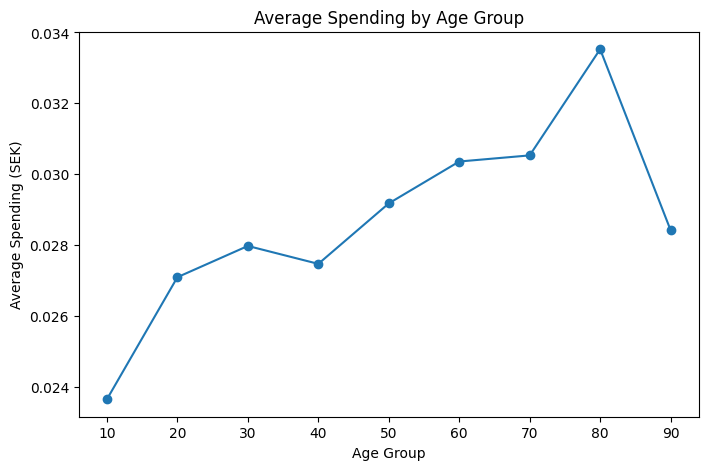

In [ ]:
df["age_group"] = (df["age"] // 10) * 10

# 연령대별 평균 구매액
age_sales = df.groupby("age_group")["price"].mean().reset_index()

# 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(age_sales["age_group"], age_sales["price"], marker="o")
plt.xlabel("Age Group")
plt.ylabel("Average Spending (SEK)")
plt.title("Average Spending by Age Group")
plt.show()

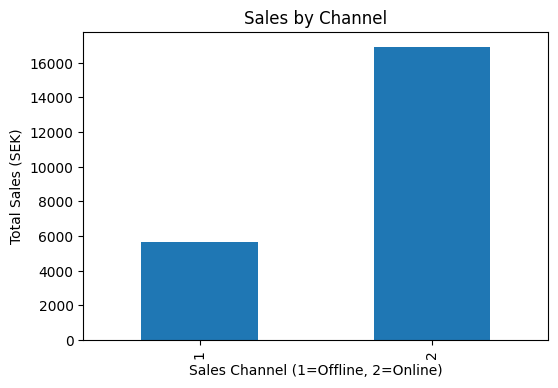

In [ ]:
channel_sales = df.groupby("sales_channel_id")["price"].sum()

channel_sales.plot(kind="bar", title="Sales by Channel", figsize=(6,4))
plt.xlabel("Sales Channel (1=Offline, 2=Online)")
plt.ylabel("Total Sales (SEK)")
plt.show()

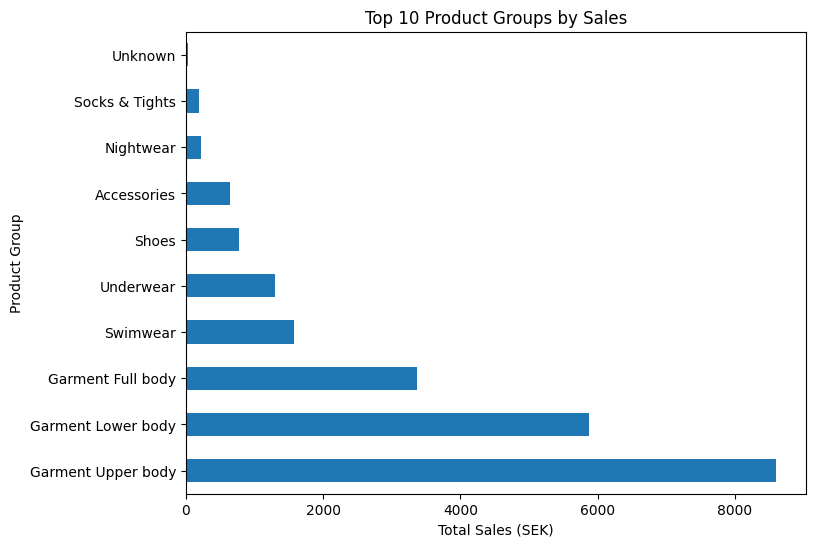

In [ ]:
top_products = df.groupby("product_group_name")["price"].sum().nlargest(10)

top_products.plot(kind="barh", figsize=(8,6), title="Top 10 Product Groups by Sales")
plt.xlabel("Total Sales (SEK)")
plt.ylabel("Product Group")
plt.show()

In [ ]:
# 중복을 제외한 순수 고객 수 구하기
unique_customer_count = df['customer_id'].nunique()

print(f"중복 제거 전 거래 건수: {len(df):,}")
print(f"중복 제거 후 순수 고객 수: {unique_customer_count:,}")

중복 제거 전 거래 건수: 812,931
중복 제거 후 순수 고객 수: 353,560


In [ ]:
# 1. 고객별 구매 횟수 계산
purchase_counts = df['customer_id'].value_counts()

# 2. 횟수별 고객 수 계산 (이때 결과에 이미 이름이 붙어 있을 수 있습니다)
frequency_dist = purchase_counts.value_counts().sort_index()

# 3. 에러 방지용: reset_index에 이름을 직접 지정해줍니다.
# name='고객_수' 라고 하면 중복 에러를 피할 수 있습니다.$
frequency_df = frequency_dist.reset_index(name='고객_수')

# 4. 첫 번째 컬럼(index였던 것)의 이름도 바꿔줍니다.
frequency_df.columns = ['구매_횟수', '고객_수']

# 결과 출력
display(frequency_df)

,구매_횟수,고객_수
0,1,175279
1,2,78385
2,3,40168
3,4,22088
4,5,12980
5,6,8113
6,7,5228
7,8,3373
8,9,2285
9,10,1492


In [ ]:
# 1. 고객별 구매 횟수 계산
customer_counts = df['customer_id'].value_counts()

# 2. 그룹 나누기
# 1회 구매자
once_buyers = (customer_counts == 1).sum()
# 2회 이상 구매자 (재구매자)
repeat_buyers = (customer_counts >= 2).sum()

print(f"1회 구매자 수: {once_buyers:,}")
print(f"2회 이상 구매자 수: {repeat_buyers:,}")

1회 구매자 수: 175,279
2회 이상 구매자 수: 178,281


In [ ]:
# 1. 고객별 총 매출액 계산 및 내림차순 정렬
customer_revenue = df.groupby('customer_id')['price'].sum().sort_values(ascending=False).reset_index()
customer_revenue.columns = ['customer_id', '총_매출액']

# 2. 상위 20%에 해당하는 인원수 계산
# int()를 사용해 정수로 만듭니다.
num_top_20 = int(len(customer_revenue) * 0.2)

# 3. 상위 20% 고객 데이터만 따로 저장
top_20_customers = customer_revenue.head(num_top_20)

# 4. 결과 출력
print(f"전체 고객 수: {len(customer_revenue):,}명")
print(f"상위 20% 고객 수: {num_top_20:,}명")
print(f"상위 20% 고객의 최소 매출액: {top_20_customers['총_매출액'].min():.4f}")

# 5. (인사이트) 이들이 전체 매출에서 차지하는 비중 확인
total_rev = customer_revenue['총_매출액'].sum()
top_20_rev = top_20_customers['총_매출액'].sum()
print(f"상위 20% 고객의 매출 비중: {(top_20_rev / total_rev)*100:.1f}%")

전체 고객 수: 353,560명
상위 20% 고객 수: 70,712명
상위 20% 고객의 최소 매출액: 0.0907
상위 20% 고객의 매출 비중: 53.9%


In [ ]:
# 1. 고객별 마지막 구매일 구하기
last_purchase = df.groupby('customer_id')['t_dat'].max().reset_index()
last_purchase.columns = ['customer_id', '최근_구매일']

# 2. 기준일 설정 (데이터상의 가장 최근 날짜)
base_date = last_purchase['최근_구매일'].max()
print(f"분석 기준일: {base_date}")

# 3. 오늘로부터 며칠 전인지 계산 (날짜 차이)
last_purchase['days_since'] = (base_date - last_purchase['최근_구매일']).dt.days

# 4. 조건에 따라 그룹 나누기
def segment_customer(days):
    if days >= 180:
        return '6개월 이상 (이탈 위험)'
    elif 90 <= days < 180:
        return '3개월~6개월 (주의)'
    else:
        return '3개월 이내 (활성)'

last_purchase['customer_segment'] = last_purchase['days_since'].apply(segment_customer)

# 5. 결과 집계
segment_counts = last_purchase['customer_segment'].value_counts().reindex([
    '3개월 이내 (활성)', '3개월~6개월 (주의)', '6개월 이상 (이탈 위험)'
])

print("\n[방문 시점별 고객 분포]")
print(segment_counts)

분석 기준일: 2019-12-31 00:00:00

[방문 시점별 고객 분포]
customer_segment
3개월 이내 (활성)       116637
3개월~6개월 (주의)       95813
6개월 이상 (이탈 위험)    141110
Name: count, dtype: int64


/Users/majinbae/h&m dataset/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


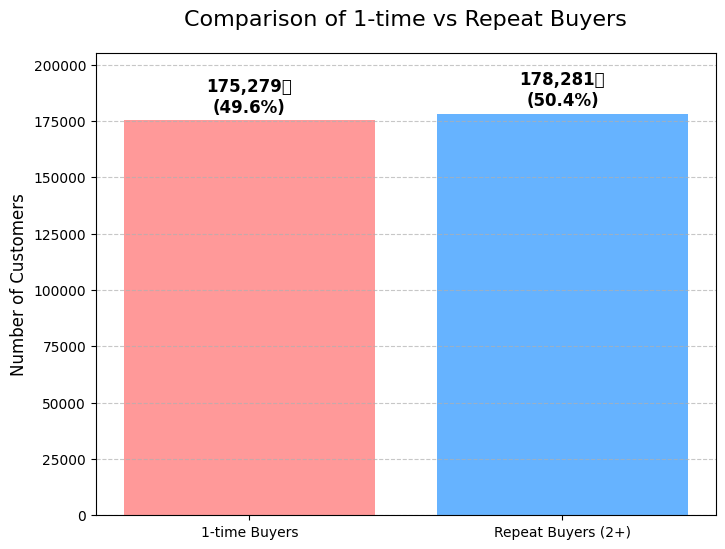

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 그래프 데이터 준비
labels = ['1-time Buyers', 'Repeat Buyers (2+)']
counts = [once_buyers, repeat_buyers]
total = once_buyers + repeat_buyers

# 2. 그래프 그리기
plt.figure(figsize=(8, 6))
colors = ['#ff9999', '#66b3ff'] # 부드러운 빨강과 파랑
bars = plt.bar(labels, counts, color=colors)

# 3. 막대 위에 숫자와 퍼센트 표시하기
for bar in bars:
    height = bar.get_height()
    percentage = (height / total) * 100
    plt.text(bar.get_x() + bar.get_width()/2., height + (height * 0.01),
             f'{int(height):,}명\n({percentage:.1f}%)',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# 4. 스타일링
plt.title('Comparison of 1-time vs Repeat Buyers', fontsize=16, pad=20)
plt.ylabel('Number of Customers', fontsize=12)
plt.ylim(0, max(counts) * 1.15) # 텍스트가 잘리지 않게 Y축 여유 공간 확보
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
# 1. 고객별로 구매 횟수와 회원 상태를 가져옵니다.
# 중복을 제거하면서 각 고객의 상태(status)와 총 구매 건수를 구합니다.
customer_summary = df.groupby('customer_id').agg({
    'club_member_status': 'first',  # 고객의 상태
    't_dat': 'count'                # 총 구매 횟수
}).rename(columns={'t_dat': 'purchase_count'})

# 2. 구매 횟수에 따라 '1회'와 '2회 이상'으로 라벨을 붙여줍니다.
customer_summary['buyer_type'] = customer_summary['purchase_count'].apply(
    lambda x: '1-time Buyer' if x == 1 else 'Repeat Buyer (2+)'
)

# 3. 회원 상태(status)와 구매 유형(buyer_type)별로 인원수를 집계합니다.
status_buyer_dist = customer_summary.groupby(['club_member_status', 'buyer_type']).size().unstack(fill_value=0)

# 결과 출력
print("회원 상태별 구매 유형 인원수:")
display(status_buyer_dist)



회원 상태별 구매 유형 인원수:


buyer_type,1-time Buyer,Repeat Buyer (2+)
club_member_status,,
ACTIVE,166872,175128
LEFT CLUB,57,55
PRE-CREATE,8350,3098


In [ ]:
# 1. 고객별 상태와 구매 횟수를 집계합니다.
# 상태(status)는 고객별로 하나이므로 'first'를 사용합니다.
new_member_analysis = df.groupby('customer_id').agg({
    'club_member_status': 'first',
    't_dat': 'count'
}).rename(columns={'t_dat': 'purchase_count'})

# 2. 상태가 'PRE-CREATE'인 고객들만 먼저 필터링합니다.
pre_create_members = new_member_analysis[new_member_analysis['club_member_status'] == 'ACTIVE']

# 3. 그중에서 구매 횟수가 2회 이상인 사람을 찾습니다.
pre_create_repeat_buyers = pre_create_members[pre_create_members['purchase_count'] >= 2]

# 4. 결과 출력
total_pre = len(pre_create_members)
repeat_pre = len(pre_create_repeat_buyers)

print(f"전체 ACTIVE 고객 수: {total_pre:,}명")
print(f"그중 재구매(2회 이상) 고객 수: {repeat_pre:,}명")
print(f"신규 가입자 내 재구매율: {(repeat_pre / total_pre)*100:.2f}%")

전체 ACTIVE 고객 수: 342,000명
그중 재구매(2회 이상) 고객 수: 175,128명
신규 가입자 내 재구매율: 51.21%


In [ ]:
# customer_id로 그룹을 묶고, price(가격) 컬럼을 합산(sum)합니다.
customer_revenue = transactions.groupby('customer_id')['price'].sum().reset_index()

# 컬럼 이름을 알아보기 쉽게 '총_매출액'으로 바꿉니다.
customer_revenue.columns = ['customer_id', '총_매출액']

# 매출액이 높은 순서대로(내림차순) 정렬해서 보여줍니다.
customer_revenue = customer_revenue.sort_values(by='총_매출액', ascending=False)

# 결과 확인 (상위 10명)
display(customer_revenue.head(10))

,customer_id,총_매출액
340401,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b,2.01
6887,03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296,1.84
428809,efaafb08a00e63ce561a67c31c1ab7e720d4f394a78c4705518dc02084a29172,1.74
299300,a728b385ebbb4b2da7b5f5d4d945e411117462ac413c449942634e7cb2bf90ba,1.73
323729,b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71,1.68
386983,d80ed4ababfa96812e22b911629e6bcbf5093769051ea447e2b696ac98a3dae9,1.53
194802,6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2e57161f0ef810a4b55,1.53
42513,17be8f7a66038e9e11b15830a444e2c16140479c858cf573a6ecafe6ed9542cf,1.52
265195,94304b03ce46e62b360d7f6921dd7a498f189ee8e5c1cc295242608eaa86f8ab,1.49
383948,d656aff527a119a1c1f23e09281ad13305e11584b977b48c3a35f048d2a713eb,1.48


In [ ]:
# 1. 고객별로 매출 합계(sum)와 구매 횟수(count)를 동시에 계산
top_20_summary = transactions.groupby('customer_id')['price'].agg(['sum', 'count'])

# 2. 컬럼 이름을 이해하기 쉽게 변경
top_20_summary.columns = ['총_매출액', '구매_횟수']

# 3. 총_매출액을 기준으로 내림차순 정렬하고 상위 20명만 추출
top_20_summary = top_20_summary.sort_values(by='총_매출액', ascending=False).head(20)

# 4. 결과 출력
display(top_20_summary)

,총_매출액,구매_횟수
customer_id,,
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b,2.01,60
03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296,1.84,43
efaafb08a00e63ce561a67c31c1ab7e720d4f394a78c4705518dc02084a29172,1.74,45
a728b385ebbb4b2da7b5f5d4d945e411117462ac413c449942634e7cb2bf90ba,1.73,41
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71,1.68,53
d80ed4ababfa96812e22b911629e6bcbf5093769051ea447e2b696ac98a3dae9,1.53,32
6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2e57161f0ef810a4b55,1.53,34
17be8f7a66038e9e11b15830a444e2c16140479c858cf573a6ecafe6ed9542cf,1.52,11
94304b03ce46e62b360d7f6921dd7a498f189ee8e5c1cc295242608eaa86f8ab,1.49,37


In [ ]:
 1. 각 상품명(prod_name)별로 가장 대표가 되는 ID(가장 작은 번호)를 미리 뽑아둡니다.
df_representative_id = df_items.groupby('prod_name')['article_id'].min().reset_index()
df_representative_id.columns = ['prod_name', 'rep_article_id']
# 2. 1월~12월 데이터를 통합합니다.
monthly_top5_list = []
for m in range(1, 13):
    df_month = df_merged[df_merged['month'] == m]
    # 상품명으로 묶어서 매출과 판매량 합산
    top_5 = df_month.groupby('prod_name').agg({
        'revenue': 'sum',
        'sales_count': 'sum'
    }).reset_index()
    # 매출 상위 5개 추출
    top_5 = top_5.nlargest(5, 'revenue')
    top_5['month'] = m
    # 3. 미리 뽑아둔 '대표 ID'를 이름에 맞게 붙여줍니다
    top_5 = pd.merge(top_5, df_representative_id, on='prod_name', how='left')
    monthly_top5_list.append(top_5)
# 결과 합치기 및 보기 좋게 정리
df_final_fixed = pd.concat(monthly_top5_list)
df_final_fixed = df_final_fixed[['month', 'prod_name', 'rep_article_id', 'revenue', 'sales_count']]
print("1월~12월 월별 통합 Top 5")
display(df_final_fixed.style.hide(axis='index'))

IndentationError: unexpected indent (2675465999.py, line 1)